# <span style="color:#FA8072"> Churn-Smart Banking: Predicting Customer Attrition </span>
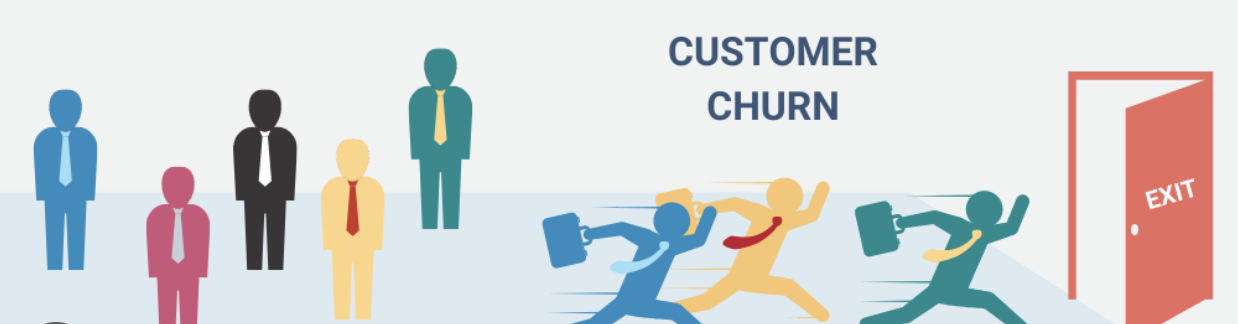


# <span style="color:#FA8072"> Table of Contents </span>

* [1. Summary](#summary)
* [2. Import Libraries](#import_libraries)
* [3. Load & Understand Data](#load_data)
* [4. Exploratory Data Analysis](#eda)
    * [4.1 Categorical Variables](#categorical_variables)
    * [4.2 Numerical Variables](#numerical_variables)
* [5. Data Transformation](#data_transformation)
* [6. Model Building](#model_building)
* [7. Conclusion](#conclusion)


# <span style="color:#FA8072"> 1. Summary </span> <a class="anchor" id="summary"></a>


<h4> Customer churn, also known as customer attrition, refers to customers discontinuing their relationship with a business or organization. In the banking industry, predicting customer churn is of great importance as it allows banks to address customer needs, improve retention strategies, and save costs associated with acquiring new customers.Identifying at-risk customers allows banks to implement personalized retention strategies, improving customer experience and reducing attrition rates.</h4>

<h4> By understanding the factors that contribute to churn, banks can tailor their services and engage in targeted efforts to retain customers. In this project, we aim to perform exploratory data analysis (EDA) and develop a churn prediction model to forecast which customers are likely to churn based on historical data and various features. Our goal is to provide valuable insights and recommendations to the bank to mitigate churn, improve customer satisfaction, and foster long-lasting customer relationships. </h4>

# <span style="color:#FA8072"> 2. Import Libraries </span> <a class="anchor" id="import_libraries"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-churn-for-bank-customers/Churn_Modelling.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

# <span style="color:#FA8072"> 3. Load & Understand Data </span> <a class="anchor" id="load_data"></a>

In [3]:
df = pd.read_csv('../input/predicting-churn-for-bank-customers/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#Check statistical values for fields with numerical datatype
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [8]:
#Check statistical values for fields with other than numerical datatype
df.describe(exclude=np.number).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


**Key Findings:**
1. Flawless Data: The dataset is complete, with no missing values to impede our analysis.
2. Streamlining for Success: To build an effective churn model, we'll exclude irrelevant fields like RowNumber, CustomerID, and Surname that hold no predictive value.
3. Focus on "Exited": Our target variable, "Exited," serves as the key indicator of customer churn, guiding our efforts to understand and predict attrition.

# <span style="color:#FA8072"> 4.  Exploratory Data Analysis </span> <a class="anchor" id="eda"></a>

## <span style="color:#FA8072"> 4.1 Categorical Variables </span> <a class="anchor" id="categorical_variables"></a>

### Exited
**Summary**
1. Understanding "Exited": The variable "Exited" represents whether a customer is an existing customer (0) or a churned customer (1), offering valuable insights into customer retention.
2. Data Imbalance: The dataset is skewed, with approximately 80% of the data representing existing customers and 20% representing churned customers. This imbalance requires careful handling during model development to ensure accurate predictions and unbiased results.

In [9]:
#Distribution
df['Exited'].value_counts(normalize=True)*100

0    79.63
1    20.37
Name: Exited, dtype: float64

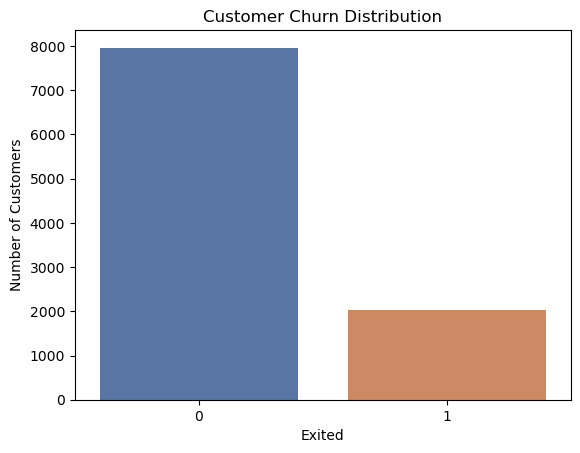

In [10]:
#Customer Churn Distribution Plot
palette='deep'
sns.set_palette(palette)
    
sns.countplot(data=df, x='Exited')

plt.xlabel('Exited')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Distribution')

plt.show()

### Geography
**Summary**
1. Customer Churn Data Snapshot: The dataset encompasses customer churn data from three countries: France, Germany, and Spain, offering a diverse perspective on customer behavior.
2. Customer Distribution: Among the countries, France constitutes 50% of the customer base, followed by Germany and Spain, each accounting for 25% of customers.
3. Churn Analysis: Interestingly, Germany exhibits the highest churn rate, with approximately 32% of its customers churning. In comparison, both France and Spain experience a churn rate of around 16% among their respective customer bases.

In [11]:
#Distribution
df['Geography'].value_counts(normalize=True)*100

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

In [12]:
#Distribution of Customer Churn in different Geographies
df.groupby('Geography')['Exited'].value_counts(normalize=True).mul(100)

Geography  Exited
France     0         83.845233
           1         16.154767
Germany    0         67.556796
           1         32.443204
Spain      0         83.326605
           1         16.673395
Name: Exited, dtype: float64

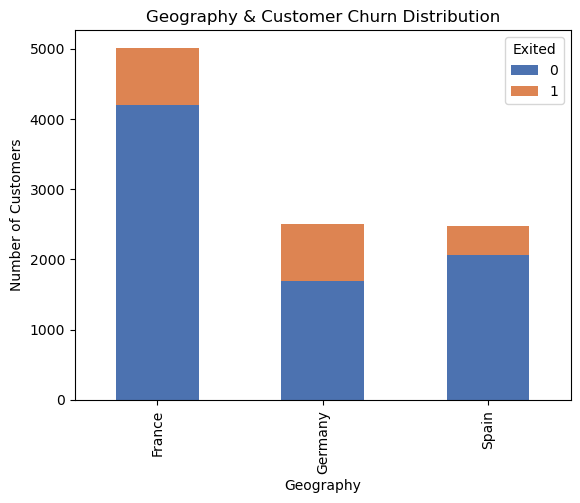

In [13]:
#Plot
palette = "deep" 
sns.set_palette(palette)

pd.crosstab(df['Geography'], df['Exited']).plot(kind='bar', stacked=True)
    
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.title('Geography & Customer Churn Distribution')

plt.show()

### Gender
**Summary**
1. Customer Gender Distribution: The customer base is divided into male and female customers, with males comprising 54% and females accounting for 45% of the total customer population.
2. Churn Rates by Gender: Interestingly, 25% of female customers have churned, indicating a higher attrition rate among this group. In comparison, the churn rate for male customers stands at 16%, suggesting relatively lower customer churn in this segment.

In [14]:
#Distribution
df['Gender'].value_counts(normalize=True)*100

Male      54.57
Female    45.43
Name: Gender, dtype: float64

In [15]:
#Distribution of Customer Churn between genders
df.groupby('Gender')['Exited'].value_counts(normalize=True).mul(100)

Gender  Exited
Female  0         74.928461
        1         25.071539
Male    0         83.544072
        1         16.455928
Name: Exited, dtype: float64

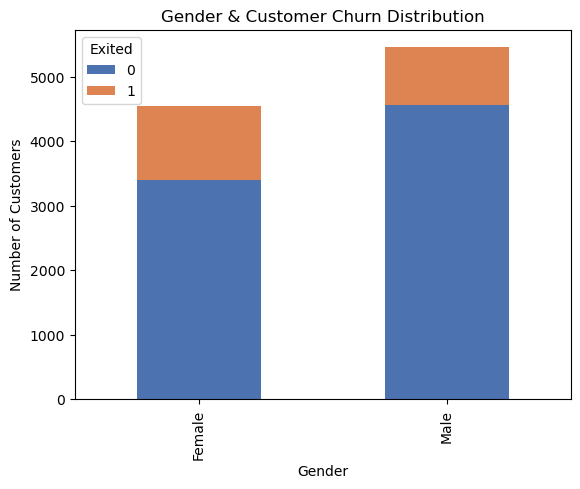

In [16]:
#Plot
palette = "deep" 
sns.set_palette(palette)

pd.crosstab(df['Gender'], df['Exited']).plot(kind='bar', stacked=True)
    
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Gender & Customer Churn Distribution')

plt.show()

### Tenure
**Summary**
1. Tenure Insights: The duration of customer tenure spans from 0 years to 10 years, with an average tenure of 5 years. This indicates a broad range of customer relationships with the bank.
2. Concentrated Tenure Range: The majority of customers, approximately 90%, have a tenure ranging from 1 year to 9 years. This suggests a concentration of customer loyalty within this timeframe, highlighting the significance of establishing long-term relationships with clients.

In [17]:
#Distribution of Tenure
print(df['Tenure'].describe())
print("\n---------------------\n")
print(df['Tenure'].value_counts(normalize=True).mul(100).sort_index())

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

---------------------

0      4.13
1     10.35
2     10.48
3     10.09
4      9.89
5     10.12
6      9.67
7     10.28
8     10.25
9      9.84
10     4.90
Name: Tenure, dtype: float64


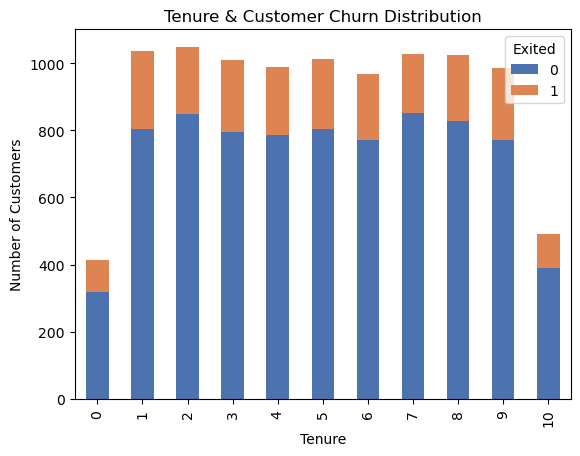

In [18]:
#Plot
palette = "deep" 
sns.set_palette(palette)

pd.crosstab(df['Tenure'], df['Exited']).plot(kind='bar', stacked=True)
    
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Tenure & Customer Churn Distribution')

plt.show()

### Number of Products
**Summary**
1. Product Range: Customers have a varying number of products, typically ranging from 1 to 4. This indicates diversity in the level of engagement with the bank's offerings.
2. Dominant Product Distribution: An overwhelming majority of customers (approximately 96.7%) possess either 1 product (50.8%) or 2 products (45.9%). This suggests a concentration of customer preferences within this range.
3. Churned Customers: Notably, all customers with 4 card products have churned, indicating a high likelihood of attrition among this group.
4. Churn Rates by Product: Among customers with 3 card products, a significant proportion (82%) have churned, highlighting the importance of analyzing product-specific churn patterns.

In [19]:
#Distribution of NumOfProducts
print(df['NumOfProducts'].describe())
print("\n---------------------\n")
print(df['NumOfProducts'].value_counts().sort_index())
print("\n---------------------\n")
print(round(df.groupby('NumOfProducts')['Exited'].value_counts(normalize=True).mul(100),2))

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64

---------------------

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

---------------------

NumOfProducts  Exited
1              0          72.29
               1          27.71
2              0          92.42
               1           7.58
3              1          82.71
               0          17.29
4              1         100.00
Name: Exited, dtype: float64


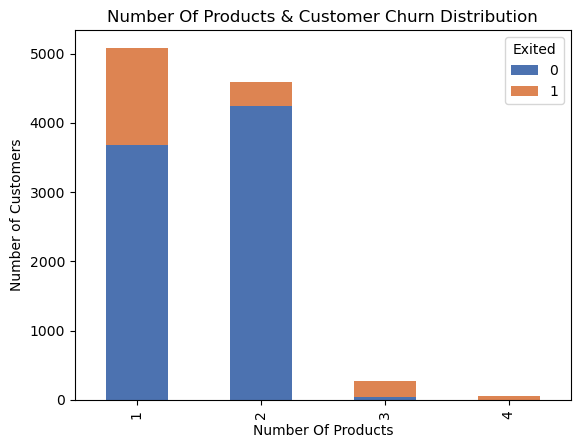

In [20]:
#Plot
palette = "deep" 
sns.set_palette(palette)

pd.crosstab(df['NumOfProducts'], df['Exited']).plot(kind='bar', stacked=True)
    
plt.xlabel('Number Of Products')
plt.ylabel('Number of Customers')
plt.title('Number Of Products & Customer Churn Distribution')

plt.show()

### Has Credit Card
**Summary**
1. Credit Card Usage: Approximately 70% of customers possess a credit card, indicating a significant portion of the customer base utilizing this financial product.

In [21]:
#Distribution of HasCrCard
print(df['HasCrCard'].describe())
print("\n---------------------\n")
print(df['HasCrCard'].value_counts().sort_index())
print("\n---------------------\n")
print(round(df.groupby('HasCrCard')['Exited'].value_counts(normalize=True).mul(100),2))

count    10000.00000
mean         0.70550
std          0.45584
min          0.00000
25%          0.00000
50%          1.00000
75%          1.00000
max          1.00000
Name: HasCrCard, dtype: float64

---------------------

0    2945
1    7055
Name: HasCrCard, dtype: int64

---------------------

HasCrCard  Exited
0          0         79.19
           1         20.81
1          0         79.82
           1         20.18
Name: Exited, dtype: float64


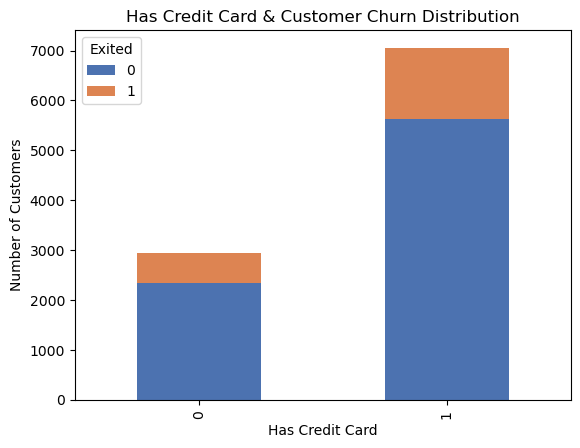

In [22]:
#Plot
palette = "deep" 
sns.set_palette(palette)

pd.crosstab(df['HasCrCard'], df['Exited']).plot(kind='bar', stacked=True)
    
plt.xlabel('Has Credit Card')
plt.ylabel('Number of Customers')
plt.title('Has Credit Card & Customer Churn Distribution')

plt.show()

### Is Active Member
**Summary**
1. Active Membership: Approximately 51% of customers are active members, signifying a substantial portion of the customer base engaged in the bank's membership program.
2. Churn Comparison: Among active members, 14% have churned, while among non-active members, around 27% have churned. This suggests that non-active members have a higher likelihood of churn compared to active members, emphasizing the importance of promoting active membership to enhance customer retention.

In [23]:
#Distribution of IsActiveMember
print(df['IsActiveMember'].describe())
print("\n---------------------\n")
print(df['IsActiveMember'].value_counts().sort_index())
print("\n---------------------\n")
print(round(df.groupby('IsActiveMember')['Exited'].value_counts(normalize=True).mul(100),2))

count    10000.000000
mean         0.515100
std          0.499797
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: IsActiveMember, dtype: float64

---------------------

0    4849
1    5151
Name: IsActiveMember, dtype: int64

---------------------

IsActiveMember  Exited
0               0         73.15
                1         26.85
1               0         85.73
                1         14.27
Name: Exited, dtype: float64


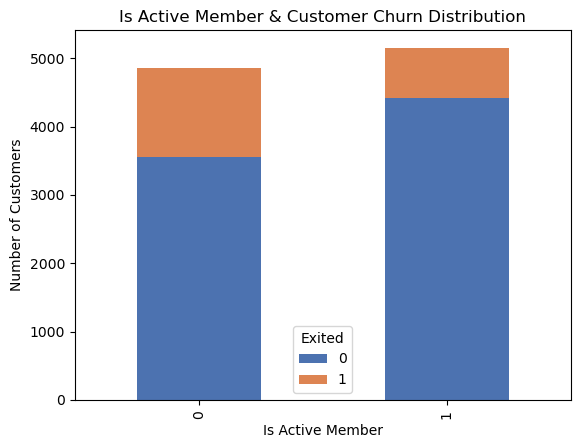

In [24]:
#Plot
palette = "deep" 
sns.set_palette(palette)

pd.crosstab(df['IsActiveMember'], df['Exited']).plot(kind='bar', stacked=True)
    
plt.xlabel('Is Active Member')
plt.ylabel('Number of Customers')
plt.title('Is Active Member & Customer Churn Distribution')

plt.show()

## <span style="color:#FA8072"> 4.2 Numerical Variables </span> <a class="anchor" id="numerical_variables"></a>

### Credit Score
**Summary**
1. Credit Score Range: The credit scores of customers range from 350 to 850, reflecting the variation in their creditworthiness.
2. Churned Customers: Notably, all customers with credit scores below 400 have churned. This highlights the significance of credit score as a potential factor contributing to customer attrition, emphasizing the need to address credit-related issues to improve customer retention.

In [25]:
#Distribution of Credit Score
print(df['CreditScore'].describe())
print("\n---------------------\n")
print(df['CreditScore'].value_counts())

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

---------------------

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64


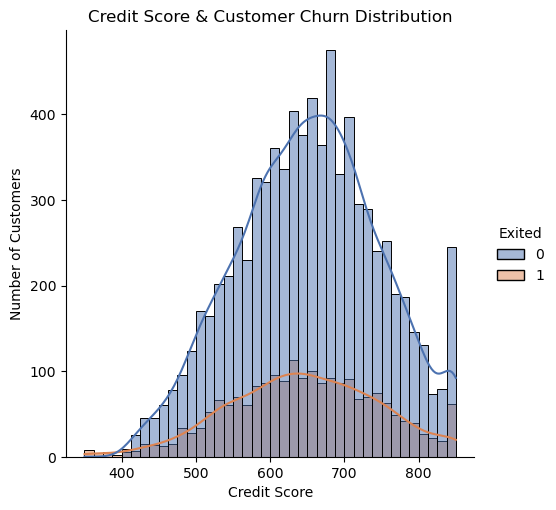

In [26]:
#Plot
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=df, x='CreditScore',hue='Exited', kde=True, bins=40)
    
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers')
plt.title('Credit Score & Customer Churn Distribution')

plt.show()

### Age
**Summary**
1. Age Range: The age of customers spans from 18 to 92, with an average age of around 39. This indicates a diverse customer base in terms of age.
2. High Churn Rate: Notably, approximately 56% of customers in the age range of 50 to 60 has churned. This age group exhibits a significantly higher churn rate, suggesting the need for targeted retention strategies for customers in this age range.
3. Age Distribution: The distribution of customer age is right-skewed (positively skewed), indicating that there are relatively fewer customers in older age groups. This skewness suggests the importance of considering age as a potential factor in churn prediction and implementing appropriate measures to retain customers of all age ranges.

In [27]:
#Distribution of Age
print(df['Age'].describe())
print("\n---------------------\n")
print(df['Age'].value_counts())

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

---------------------

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64


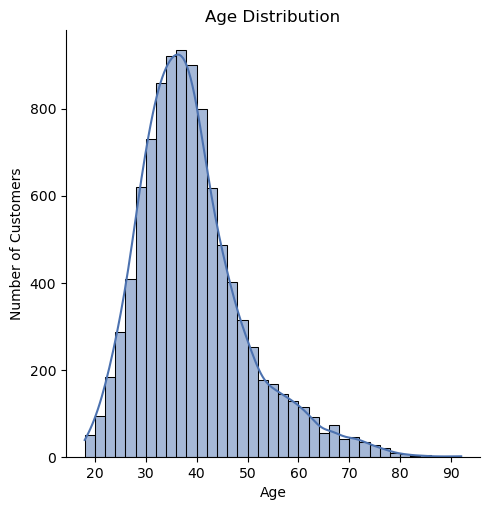

In [28]:
#Plot
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=df, x='Age', kde=True, bins=37)
    
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Age Distribution')

plt.show()

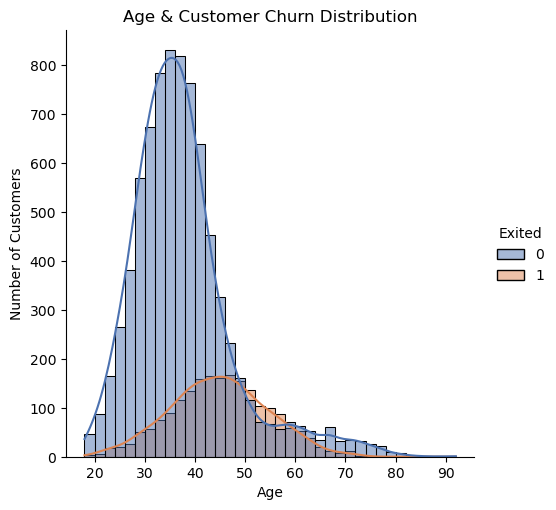

In [29]:
#Plot
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=df, x='Age', hue='Exited',kde=True, bins=37)
    
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Age & Customer Churn Distribution')

plt.show()

### Balance
**Summary**
1. Zero Balance Accounts: Approximately 36.17% of customers have zero balance in their bank accounts, indicating a significant portion of customers with no funds in their accounts. Out of these customers, 13% have churned. 
2. Balance Distribution: Excluding the customers with zero balance, the distribution of account balances follows a normal distribution pattern. This suggests that the remaining customers, who maintain a positive balance, have a more typical distribution of account balances, enabling the bank to better understand and manage their financial status.

In [30]:
#Distribution of Balance
print(df['Balance'].describe())
print("\n---------------------\n")
print(df['Balance'].value_counts().sort_index())

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

---------------------

0.00         3617
3768.69         1
12459.19        1
14262.80        1
16893.59        1
             ... 
216109.88       1
221532.80       1
222267.63       1
238387.56       1
250898.09       1
Name: Balance, Length: 6382, dtype: int64


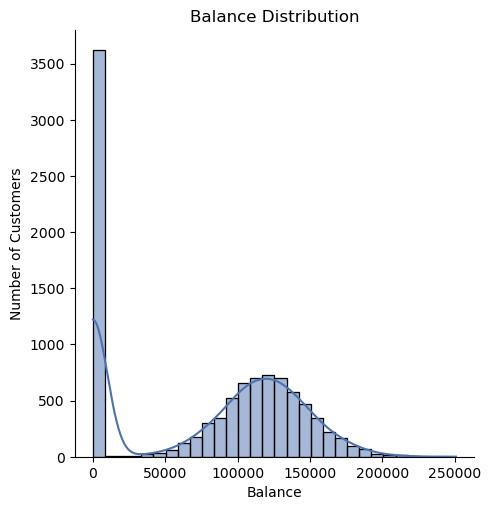

In [31]:
#Plot
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=df, x='Balance', kde=True, bins=30)
    
plt.xlabel('Balance')
plt.ylabel('Number of Customers')
plt.title('Balance Distribution')

plt.show()

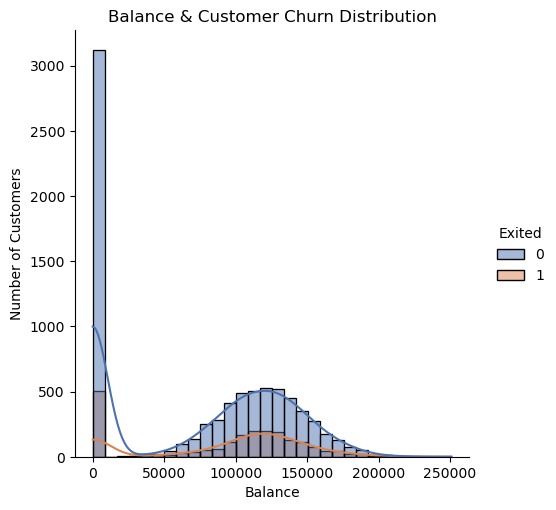

In [32]:
#Plot
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=df, x='Balance', hue='Exited',kde=True, bins=30)
    
plt.xlabel('Balance')
plt.ylabel('Number of Customers')
plt.title('Balance & Customer Churn Distribution')

plt.show()

### EstimatedSalary
**Summary**
1. Estimated Salary Range: The estimated salary of customers ranges from $12 to 200k, indicating a wide variation in income levels among customers.
2. Balanced Salary Distribution: The distribution of salaries is almost equally spread across this range, suggesting a relatively balanced representation of customers across different income levels. Similarly, the distribution of customer churn is also evenly distributed, indicating that churn is not significantly correlated with salary alone.

In [33]:
#Distribution of EstimatedSalary
print(df['EstimatedSalary'].describe())
print("\n---------------------\n")
print(df['EstimatedSalary'].value_counts().sort_index())

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

---------------------

11.58        1
90.07        1
91.75        1
96.27        1
106.67       1
            ..
199909.32    1
199929.17    1
199953.33    1
199970.74    1
199992.48    1
Name: EstimatedSalary, Length: 9999, dtype: int64


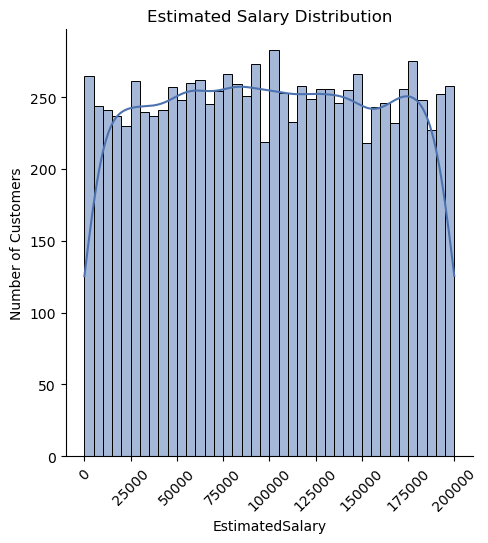

In [34]:
#Plot
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=df, x='EstimatedSalary', kde=True, bins=40)
    
plt.xlabel('EstimatedSalary')
plt.ylabel('Number of Customers')
plt.title('Estimated Salary Distribution')
plt.xticks(rotation=45)

plt.show()

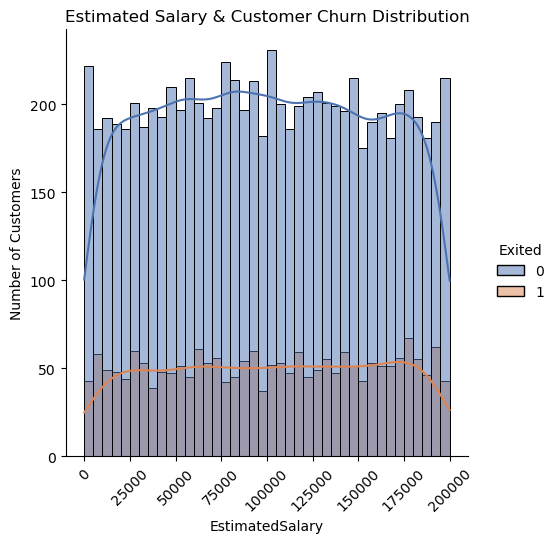

In [35]:
#Plot
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=df, x='EstimatedSalary',hue='Exited', kde=True, bins=40)
    
plt.xlabel('EstimatedSalary')
plt.ylabel('Number of Customers')
plt.title('Estimated Salary & Customer Churn Distribution')
plt.xticks(rotation=45)

plt.show()

# <span style="color:#FA8072"> 5. Data Transformation </span> <a class="anchor" id="data_transformation"></a>

#### Drop Columns
We are dropping the columns 'RowNumber', 'CustomerId', and 'Surname' from the dataset as they uniquely identify each customer and do not provide any relevant information for building the customer churn model. Removing these columns allows us to focus on the meaningful features that contribute to predicting churn and improve the efficiency of our analysis.

In [36]:
print("Size of Dataset before dropping columns : ",df.shape)
drop_columns = ['RowNumber','CustomerId','Surname']
df.drop(drop_columns,axis=1,inplace=True)
print("Size of Dataset after dropping columns : ",df.shape)

Size of Dataset before dropping columns :  (10000, 14)
Size of Dataset after dropping columns :  (10000, 11)


#### One Hot Encoding

We are converting the categorical columns 'Geography' and 'Gender' into numerical representations using one-hot encoding. This transformation allows us to include these variables in our analysis and prediction models by converting them into binary values. By encoding these columns, we can effectively utilize their information for further analysis and modeling.

In [37]:
categorical_columns = ['Geography','Gender']

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df[categorical_columns])

# Concatenate the one-hot encoded columns to the original dataframe
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

#Drop original categorical columns
df_encoded.drop(categorical_columns,axis=1,inplace=True)

In [38]:
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


### Normalization

We are applying normalization to the numerical values in order to standardize their scales and bring them into a consistent range. This normalization process ensures that all numerical features are treated equally during analysis and modeling. By normalizing the data, we can avoid any bias or distortion caused by varying scales and improve the accuracy and reliability of our results.

In [39]:
continuous_columns = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_encoded[continuous_columns] = scaler.fit_transform(df_encoded[continuous_columns])

df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1,1,0


# <span style="color:#FA8072"> 6. Model Building </span> <a class="anchor" id="model_building"></a>

In [40]:
#Method to evaluate the performance of the model
def evaluate_model(y_test,y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    
    print("\n---------------------------------------------\n")
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap of the confusion matrix using Seaborn
    sns.heatmap(cm, annot=True, cmap='Greens',fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()

### Approach 1 
1. Perform train-test split to separate the data into training and testing sets.
2. Apply cross-validation to evaluate multiple models and identify the best-performing one.
3. Use the selected model to make predictions on the testing data.

*Note that the dependent variable(Exited) was not balanced during this approach.*

In [41]:
#Train Test Split
X = df_encoded.drop('Exited',axis=1)
y = df_encoded['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 13)
(2000, 13)
(8000,)
(2000,)


In [42]:
# List of classifiers to test
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussion NB',GaussianNB()),
    ('XGB',xgb.XGBClassifier())
]

# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    # Perform cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    
    # Calculate average performance metrics
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()
    
    # Print the performance metrics
    print(f'Classifier: {clf_name}')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print('-----------------------')

Classifier: Logistic Regression
Average Accuracy: 0.8139
Average Precision: 0.7269
Average Recall: 0.5928
-----------------------
Classifier: Decision Tree
Average Accuracy: 0.7924
Average Precision: 0.6821
Average Recall: 0.6905
-----------------------
Classifier: Random Forest
Average Accuracy: 0.8615
Average Precision: 0.8154
Average Recall: 0.7094
-----------------------
Classifier: KNN
Average Accuracy: 0.8120
Average Precision: 0.7086
Average Recall: 0.6158
-----------------------
Classifier: Gaussion NB
Average Accuracy: 0.8189
Average Precision: 0.7218
Average Recall: 0.6550
-----------------------
Classifier: XGB
Average Accuracy: 0.8512
Average Precision: 0.7860
Average Recall: 0.7130
-----------------------


Classification Report
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.76      0.44      0.56       407

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000


---------------------------------------------



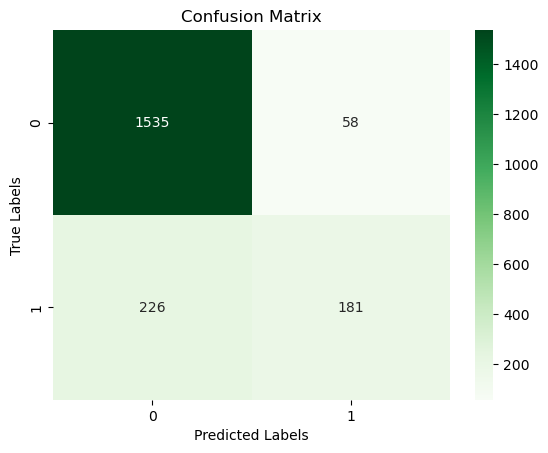

In [43]:
# Creating the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)

### Approach 2

1. Handle the imbalanced data using SMOTE Technique
2. Perform train-test split to separate the data into training and testing sets.
3. Apply cross-validation to evaluate multiple models and identify the best-performing one.
4. Use the selected model to make predictions on the testing data.

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12740, 13)
(3186, 13)
(12740,)
(3186,)


In [46]:
# List of classifiers to test
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussion NB',GaussianNB()),
    ('XGB',xgb.XGBClassifier())
]

# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    # Perform cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    
    # Calculate average performance metrics
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()
    
    # Print the performance metrics
    print(f'Classifier: {clf_name}')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print('-----------------------')

Classifier: Logistic Regression
Average Accuracy: 0.7122
Average Precision: 0.7123
Average Recall: 0.7122
-----------------------
Classifier: Decision Tree
Average Accuracy: 0.8237
Average Precision: 0.8248
Average Recall: 0.8248
-----------------------
Classifier: Random Forest
Average Accuracy: 0.8883
Average Precision: 0.8918
Average Recall: 0.8887
-----------------------
Classifier: KNN
Average Accuracy: 0.8192
Average Precision: 0.8292
Average Recall: 0.8192
-----------------------
Classifier: Gaussion NB
Average Accuracy: 0.7133
Average Precision: 0.7148
Average Recall: 0.7133
-----------------------
Classifier: XGB
Average Accuracy: 0.9040
Average Precision: 0.9050
Average Recall: 0.9040
-----------------------


Classification Report
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1593
           1       0.93      0.88      0.91      1593

    accuracy                           0.91      3186
   macro avg       0.91      0.91      0.91      3186
weighted avg       0.91      0.91      0.91      3186


---------------------------------------------



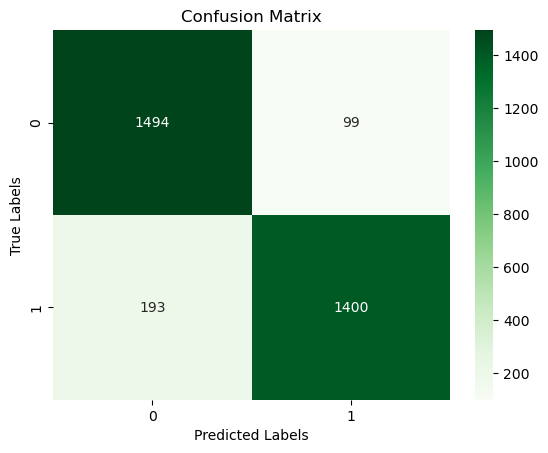

In [47]:
# Create an XGBClassifier model
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

#Compute Accuracy
evaluate_model(y_test,y_pred)

# <span style="color:#FA8072"> 7. Conclusion </span> <a class="anchor" id="conclusion"></a>

Balancing the dataset has significantly improved the overall testing data accuracy to 91%. Notably, it has substantially increased the accuracy for churned customers from the bank, elevating it from 56% to 91%. This improvement holds particular significance to us compared to the accuracy for retained customers.

### Unlocking Customer Loyalty:  Recommendations to Reduce Churn Rates and Boost Bank Retention -
1. **Utilize the predictive churn model**: Leverage the power of the churn prediction model developed in this project to proactively identify customers at risk of churn. Implement targeted retention strategies for these customers based on their specific needs and preferences. By using the predictive insights provided by the model, the bank can take proactive measures to retain valuable customers and reduce churn rates.
2. **Target Germany for churn reduction**: Germany has the highest churn rate among the analyzed countries. Implement targeted initiatives to understand the underlying factors contributing to churn in this market and devise strategies to mitigate it effectively.
3. **Enhance product offerings and customer engagement**: Since most customers have 1 or 2 products, explore opportunities to upsell or cross-sell additional products based on customer preferences and needs. Enhance communication channels and engagement to increase customer satisfaction and loyalty.
4. **Personalized Engagement**: Implement personalized retention strategies, with a specific focus on the 50-60 age group. This segment has shown a higher churn percentage, making it a crucial target for tailored initiatives.
5. **Continuously monitor and evaluate performance**: Regularly monitor churn rates, analyze customer feedback, and track the effectiveness of retention strategies. Make data-driven adjustments to optimize customer retention efforts and maximize overall profitability.